In [55]:
############################################################################
#Anderson Amaral  : IPCA Acumulado X Ano                                   #
# questions and doubts : luis.anderson.sp@gmail.com                        #  
# Python 2.7                                                               #
#Jupyter Notebook                                                          #
#Kernel : ativar kernel do Python 2.7 no terminal : source activate py2    # 
########################################################################## # 
import pandas as pd
import html5lib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Web Service do IPCA-IBGE usando Pandas Python : Tabela e Plot #


### *Abaixo fiz um pequeno web service para a extração do IPCA usanndo Pandas. Todavia, em vez de usar o site do IBGE, sei o site Portal Brasil, onde o governo também divulga esse e outros índices oficiais * ###

In [56]:

ipca = pd.read_html('http://www.portalbrasil.net/ipca.htm')

### Agora, seleciono um dos frames do site onde eu sei que se encontra a tabela de interesse:

In [57]:
ipca = ipca[5]

In [58]:
ipca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ,ACUMULADO NO ANO
1,1980.0,662,462,604,529,570,531,555,495,423,948,667,661,"99,27%"
2,1981.0,684,640,497,646,556,552,626,550,526,508,527,593,"95,65%"
3,1982.0,697,664,571,589,666,710,636,597,508,444,529,781,"104,80%"
4,1983.0,864,786,734,658,648,988,1008,911,1030,887,738,868,"163,99%"


### Alem de ter um valor nulo na amostra acima ( o artifício ".head"  chama somente as 5 primeiras colunas) , as colunas estão em números enquanto os meses como linha. Vou colocar os meses como colunas usando o código a seguir: ###

In [59]:
ipca.fillna('ANO', inplace = True)

In [60]:

ipca.columns = ipca.iloc[0] 
ipca = ipca.reindex(ipca.index.drop(0))

### Veja que acima tenho um dataframe completo do íncide do IPCA anual acumulado desde 1980. Mas eu quero somente após o Plano Real,  e somente os acumulados ao ano,  portanto, vou precisar tratar os dados nos códigos seguintes:# ##

In [61]:
ipca_acumulado =  ipca[['ANO','ACUMULADO  NO ANO']] 

### Acima eu seleciona apenas as duas colunas que me  interessa : ANO e ACUMULADO NO ANO, e chamei de IPCA acumulado.Abaixo selecionei as 5 primeiras amostras ###

In [62]:
ipca_acumulado.head()

,ANO,ACUMULADO NO ANO
1,1980,"99,27%"
2,1981,"95,65%"
3,1982,"104,80%"
4,1983,"163,99%"
5,1984,"215,27%"


### Infelizmente, como é típido em todo relatório de índices no Brasil, os número estão em vírgulas. Se estivessem com pontos em vez de vírgulas, eu poderia convertê-los facilamente para float. Como esse não é o caso, eu tenho que fazer uma pequena expressão regular para substituir as vírgulas por pontos ###

In [63]:
ipca_acumulado['ACUMULADO  NO ANO'] = ipca_acumulado['ACUMULADO  NO ANO'].str.replace('%', '')
ipca_acumulado['ACUMULADO  NO ANO'] = ipca_acumulado['ACUMULADO  NO ANO'].str.replace(',', '.')

/home/anderson/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/anderson/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Tenho interesse no IPCA acumulado ano a ano apenas após o Plano Real, ou seja, após 1994. Assim, vou usar o índice do ano 1995 para usar os valores do IPCA a partir desse ano ### 

In [64]:
 ipca_acumulado = ipca_acumulado.iloc[16:]

### Finalmente, após os tratamentos básicos, posso converter o IPCA acumulado em float ###

In [65]:
ipca_acumulado['ACUMULADO  NO ANO'] = ipca_acumulado['ACUMULADO  NO ANO'].astype(float)

### Só que eu também gostaria de colocar os anos como índices das linhas, não números aleatórios, portanto : ###

In [66]:
ipca_acumulado.set_index('ANO', drop=True, inplace = True)

### Finalmente, abaixo tenho a tabela que me interessa, e seu respectivo plot  : ### 

In [67]:
ipca_acumulado

,ACUMULADO NO ANO
ANO,
1996.0,9.56
1997.0,5.22
1998.0,1.66
1999.0,8.94
2000.0,5.97
2001.0,7.67
2002.0,12.53
2003.0,9.30
2004.0,7.60


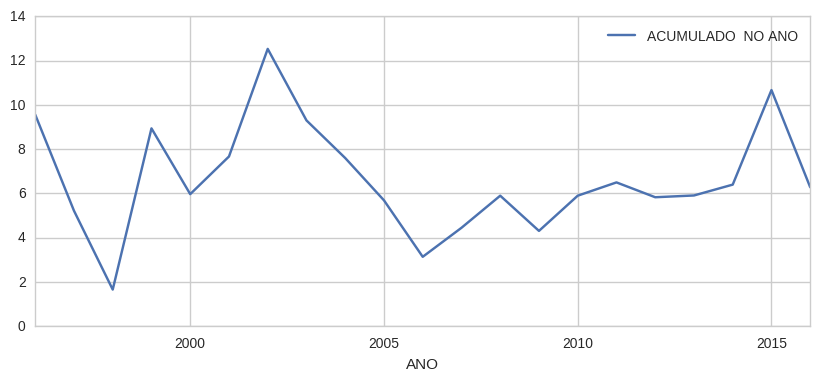

In [68]:
ipca_acumulado['ACUMULADO  NO ANO'].plot(legend=True,figsize=(10,4))


### Um Web Services desse que talvez levaria um ou dois dias pelos métodos convencionais : Usando BEAUTIFUL SOUP ou outros para extração e tratamento de dados, pode ser feito em poucas horas usando o leitor de html do Pandas Python ### 